# **Online Payment Fraud Detection with Machine Learning**

In today's digital era, online payments have become an integral part of our lives, offering convenience and speed with just a click or a tap. However, as the adoption of online payment systems grows, so does the threat of fraudulent activities. Fraudsters continue to exploit vulnerabilities, making online payment fraud detection a critical challenge for both businesses and individuals, especially those less familiar with modern technologies.

This notebook focuses on addressing the problem of online payment fraud detection using machine learning. By leveraging historical data on fraudulent transactions, we aim to build a robust model capable of distinguishing between genuine and fraudulent transactions. For this purpose, we use a dataset sourced from Kaggle, which contains detailed transaction information that helps us identify patterns indicative of fraud.

## **Dataset Overview**
The dataset provides various attributes to understand the context and nature of each transaction, such as:
- **step**: Time in hours since the start of recording.
- **type**: Type of online transaction.
- **amount**: Transaction amount.
- **nameOrig**: Identifier of the initiating customer.
- **oldbalanceOrg**: Customer's balance before the transaction.
- **newbalanceOrig**: Customer's balance after the transaction.
- **nameDest**: Identifier of the transaction recipient.
- **oldbalanceDest**: Recipient's balance before the transaction.
- **newbalanceDest**: Recipient's balance after the transaction.
- **isFraud**: Label indicating whether the transaction was fraudulent.

## **Objective**
Our goal is to analyze this dataset and develop a machine learning model to classify transactions as fraudulent or non-fraudulent. Through this notebook, we will explore the dataset, preprocess the data, and apply various machine learning techniques to address this pressing issue effectively.

## **Library Imports**

For this project, we utilize two essential Python libraries:

- **NumPy**: A powerful library for numerical computations, particularly useful for handling multi-dimensional arrays and performing mathematical operations efficiently.

- **Pandas**: A versatile library designed for data manipulation and analysis. It simplifies tasks such as reading datasets, cleaning data, and exploring relationships within the data.

In [1]:
import numpy as np
import pandas as pd

These libraries are fundamental for working with structured datasets and performing the necessary data processing steps required for machine learning.

## **Loading the Dataset**

The dataset used for this project is loaded using the **Pandas** library. The `pd.read_csv()` function reads the data from a CSV file named `onlinefraud.csv` and stores it in a DataFrame called `df`.

A **DataFrame** is a two-dimensional data structure in Pandas, similar to a table in a database or a spreadsheet, and is ideal for data manipulation and analysis. This step is essential for accessing the data and preparing it for further exploration and processing.

In [2]:
df = pd.read_csv('onlinefraud.csv')

## **Previewing the Dataset**

To quickly examine the structure and content of the dataset, we use the `head()` method. This function displays the first five rows of the DataFrame by default, providing a snapshot of the dataset's columns, data types, and sample values.

This step is crucial for verifying that the data has been loaded correctly and for gaining an initial understanding of its structure and characteristics.

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


## **Checking the Dataset Dimensions**

The `shape` attribute of a DataFrame provides the dimensions of the dataset as a tuple: `(number of rows, number of columns)`.

This information is useful for understanding the size of the dataset, helping to determine the volume of data available for analysis and the number of features or variables included.

In [4]:
df.shape

(2966310, 11)

## **Dataset Overview**

The `info()` method provides a concise summary of the dataset, including:

- The number of non-null entries in each column.
- The data types of each column.
- The overall memory usage of the DataFrame.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966310 entries, 0 to 2966309
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 248.9+ MB


This function is essential for understanding the dataset's structure, identifying missing values, and ensuring the data types are appropriate for further analysis.

## **Statistical Summary of the Dataset**

The `describe()` method generates a statistical summary of the numerical columns in the dataset, including:

- **Count**: The number of non-missing values.
- **Mean**: The average value.
- **Standard Deviation (std)**: A measure of the spread or dispersion of the values.
- **Minimum (min)**: The smallest value.
- **25th, 50th, and 75th percentiles**: Values at these quartiles.
- **Maximum (max)**: The largest value.


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2.966310e+06,2.966310e+06,2.966309e+06,2.966309e+06,2.966309e+06,2.966309e+06,2.966309e+06,2.966309e+06
mean,1.230103e+02,1.583457e+05,8.470936e+05,8.685706e+05,9.952740e+05,1.103374e+06,8.751617e-04,3.371193e-07
std,7.585347e+01,2.685184e+05,2.917737e+06,2.954174e+06,2.301765e+06,2.385387e+06,2.957019e-02,5.806198e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.800000e+01,1.264258e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.410000e+02,7.650964e+04,1.468500e+04,0.000000e+00,1.375576e+05,2.243022e+05,0.000000e+00,0.000000e+00
75%,1.860000e+02,2.121127e+05,1.141960e+05,1.539201e+05,9.450661e+05,1.130874e+06,0.000000e+00,0.000000e+00
max,2.310000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.265577e+07,1.000000e+00,1.000000e+00


This summary is valuable for understanding the distribution, range, and variability of the numerical data in the dataset.

## **Checking for Missing Values**

To identify missing data in the dataset, we use the `isnull()` method, which checks each entry for missing (null) values and returns a Boolean result. The `sum()` method then aggregates the total number of missing values in each column.


In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


This step is crucial for identifying and addressing incomplete data, which can otherwise impact the accuracy and performance of the machine learning model.

## **Checking Value Distribution in Key Columns**

The `value_counts()` method is used to analyze the distribution of values in specific columns of the dataset. For example, it is applied to the following columns:

- **`nameOrig`**: The identifier of the customer initiating the transaction.
- **`nameDest`**: The identifier of the recipient of the transaction.
- **`type`**: The type of the transaction (e.g., cash-in, cash-out).
- **`isFlaggedFraud`**: A flag indicating whether the transaction was flagged as potentially fraudulent.
- **`isFraud`**: The target variable that indicates whether the transaction is truly fraudulent (1) or not (0).


In [8]:
df.nameOrig.value_counts()

,count
nameOrig,
C1530544995,3
C1677795071,3
C400299098,3
C1999539787,3
C566980016,2
...,...
C1230336183,1
C1092611352,1
C734745949,1


In [9]:
df.nameDest.value_counts()

,count
nameDest,
C985934102,103
C1286084959,103
C665576141,99
C1590550415,94
C248609774,94
...,...
M2012671759,1
M1051536513,1
M1264534953,1


In [10]:
df.type.value_counts()

,count
type,
CASH_OUT,1055157
PAYMENT,995623
CASH_IN,651226
TRANSFER,245686
DEBIT,18618


In [11]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0.0,2966308
1.0,1


In [12]:
df.isFraud.value_counts()

,count
isFraud,
0.0,2963713
1.0,2596


By using `value_counts()`, we can observe the frequency of different categories in each of these columns, providing insights into the dataset's structure and helping to identify any imbalances or notable patterns.

#Exploratory Analysis and Visualization

## **Visualizing Feature Distributions**

In this section, we use **Matplotlib** and **Seaborn**, two popular Python libraries for data visualization, to plot histograms for several key features in the dataset.

- **Matplotlib** (`plt`): Used for creating static, interactive, and animated visualizations.
- **Seaborn** (`sns`): Built on top of Matplotlib, Seaborn provides a high-level interface for creating attractive and informative statistical graphics.

The `%matplotlib inline` command ensures that the plots are displayed directly within the notebook.

We focus on the following features:
- `step`: Represents a unit of time in hours.
- `amount`: The transaction amount.
- `oldbalanceOrg`: The balance before the transaction from the originating account.
- `newbalanceOrig`: The balance after the transaction from the originating account.
- `oldbalanceDest`: The balance before the transaction in the destination account.
- `newbalanceDest`: The balance after the transaction in the destination account.


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def showPlot(feature, bins=10, color='grey', figsize=(12, 6)):
    """
    Visualizes the distribution of a specific feature in the dataset with a histogram.

    Parameters:
    - feature (str): The column name for which the histogram will be plotted.
    - bins (int): The number of bins to be used in the histogram (default is 10).
    - color (str): The color of the bars in the histogram (default is 'grey').
    - figsize (tuple): The size of the figure (default is (12, 6)).

    Displays:
    - A histogram of the specified feature with additional context like legend, axis labels,
      and optional lines for mean/median.
    """

    # Set the plot size and style
    plt.figure(figsize=figsize)

    # Plot the histogram
    df[feature].plot(kind='hist', bins=bins, facecolor=color, edgecolor='black', alpha=0.7, label='Data Distribution')

    # Title and axis labels for better context
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(f'{feature} Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add a legend to the plot
    plt.legend(loc='upper right')

    # Calculate mean and median
    mean_value = df[feature].mean()
    median_value = df[feature].median()

    # Add lines for mean and median for better insight
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=3, label=f'Median: {median_value:.2f}')

    # Set the limits for x-axis to ensure the lines are visible
    plt.xlim(df[feature].min() - 0.1*(df[feature].max() - df[feature].min()),
             df[feature].max() + 0.1*(df[feature].max() - df[feature].min()))

    # Show grid for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

## **Visualizing the 'step' Feature**

The **'step'** feature in this dataset represents a unit of time, with each step corresponding to one hour. This feature helps us understand the chronological progression of the transactions.

We use a histogram to visualize the distribution of this feature. **The histogram helps us identify patterns in the frequency of transactions over time, which can be useful for detecting trends or anomalies in transaction behavior.**

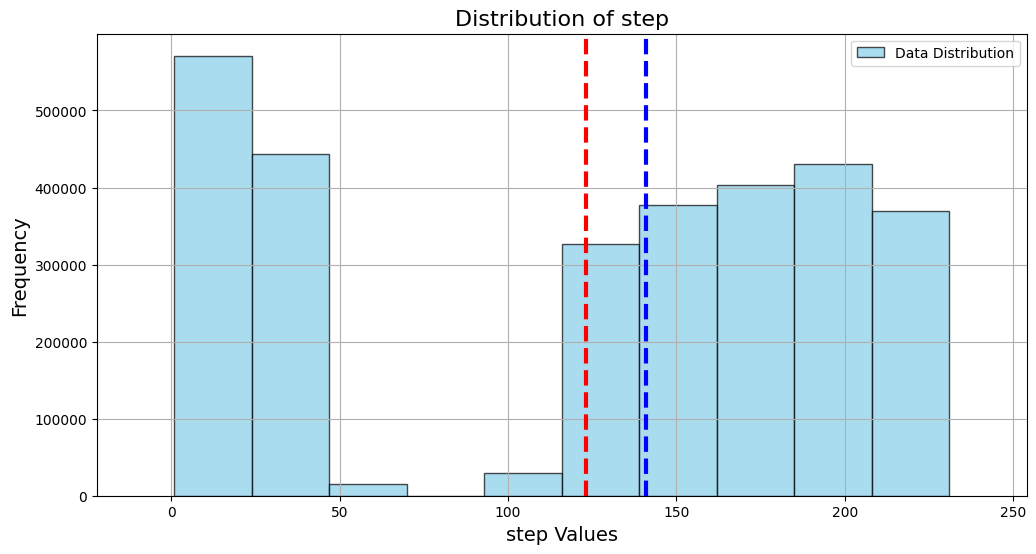

In [35]:
showPlot('step', bins=10, color='skyblue')

By analyzing the 'step' feature, we can see if there are certain time periods where transactions occur more frequently, which may indicate particular behavior or activity spikes.

## **Visualizing the 'amount' Feature**

The **'amount'** feature represents the monetary value of each transaction. This feature is key in understanding the financial scale of the transactions and identifying any anomalies or unusually large transactions that may indicate fraudulent activity.

We use a histogram to visualize the distribution of transaction amounts. **The histogram allows us to see how the transaction amounts are distributed across the dataset, helping to identify any trends, outliers, or spikes in transaction values.**


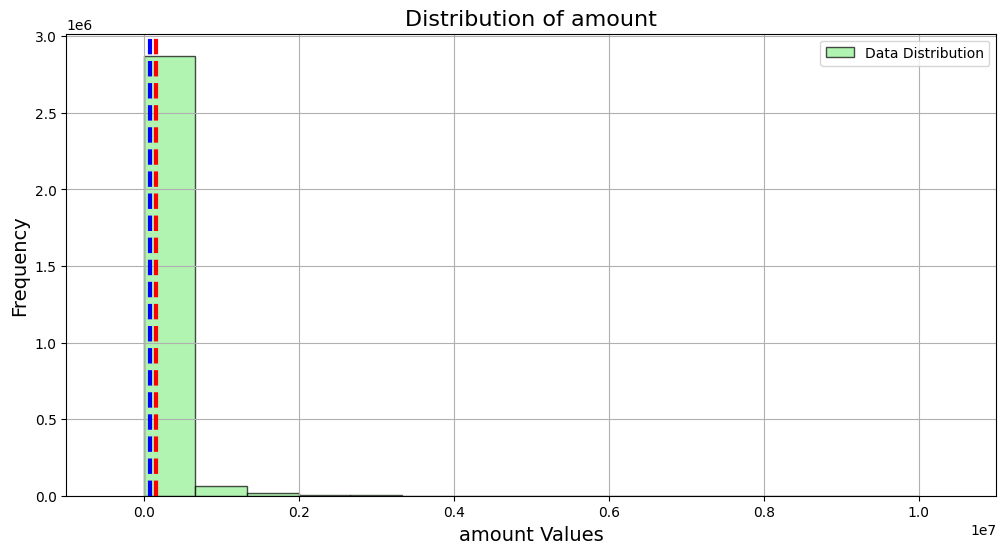

In [36]:
showPlot('amount', bins=15, color='lightgreen')

By analyzing the 'amount' feature, we can assess the typical transaction size and identify any transactions that deviate significantly from the norm, which might require further investigation.

## **Visualizing the 'oldbalanceOrg' Feature**

The **'oldbalanceOrg'** feature represents the balance of the originating account before the transaction is made. This is an important feature as it provides context for understanding the financial capacity of the originating account prior to the transaction and helps in identifying unusually high or low transaction activities.

We use a histogram to visualize the distribution of the **'oldbalanceOrg'** values. **The histogram will allow us to explore how the originating account balances are distributed and identify any trends or outliers in the data.**


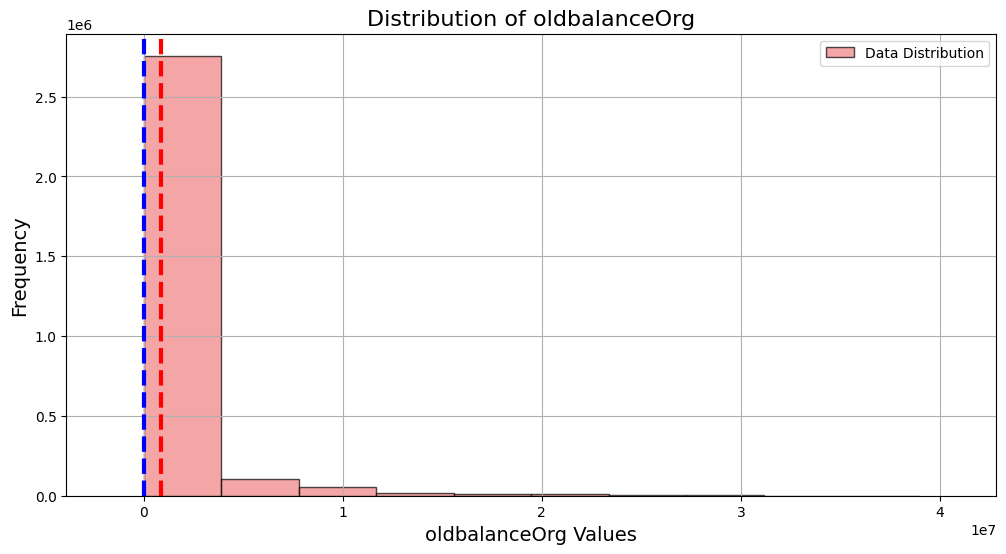

In [37]:
showPlot('oldbalanceOrg', bins=10, color='lightcoral')

By analyzing the 'oldbalanceOrg' feature, we can assess typical account balances and determine if there are any unusually large or small balances that might suggest suspicious behavior or anomalies in the transactions.

## **Visualizing the 'newbalanceOrig' Feature**

The **'newbalanceOrig'** feature represents the balance of the originating account after the transaction has been completed. This is an important feature as it shows the updated financial status of the originating account, reflecting the effect of the transaction on the account balance.

We use a histogram to visualize the distribution of **'newbalanceOrig'** values. **The histogram allows us to explore how the balances of originating accounts are distributed post-transaction and to identify any significant shifts or trends.**


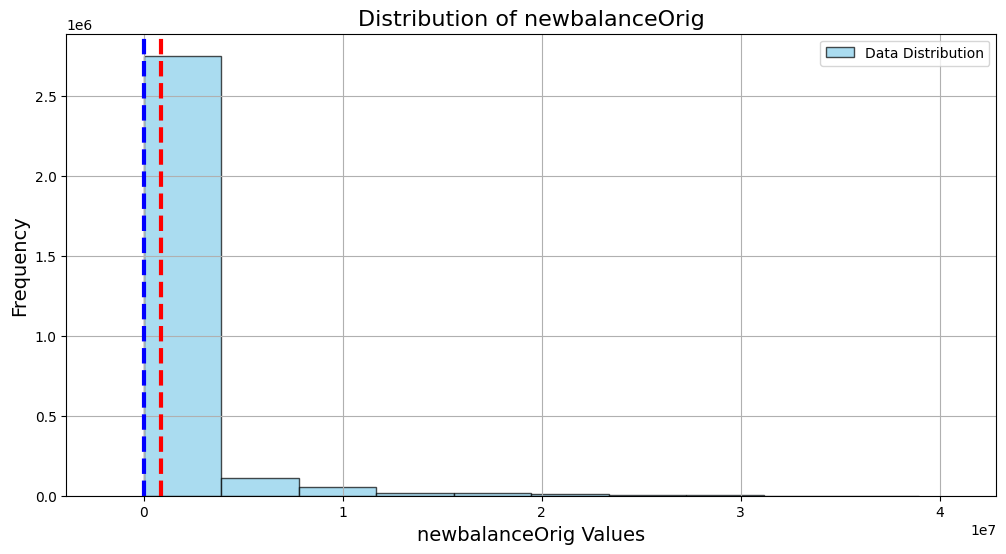

In [38]:
showPlot('newbalanceOrig', bins=10, color='skyblue')

By analyzing the 'newbalanceOrig' feature, we can determine if there are any unusually large or small balances after transactions, which could indicate irregular activity or unusual transaction patterns.

## **Visualizing the 'oldbalanceDest' Feature**

The **'oldbalanceDest'** feature represents the balance of the destination account before the transaction. This is an important feature as it provides context on the financial state of the recipient's account prior to receiving the transaction amount.

We use a histogram to visualize the distribution of **'oldbalanceDest'** values. **This helps us observe how the balances of destination accounts are distributed before transactions and can highlight any irregularities in the starting balance of recipient accounts.**


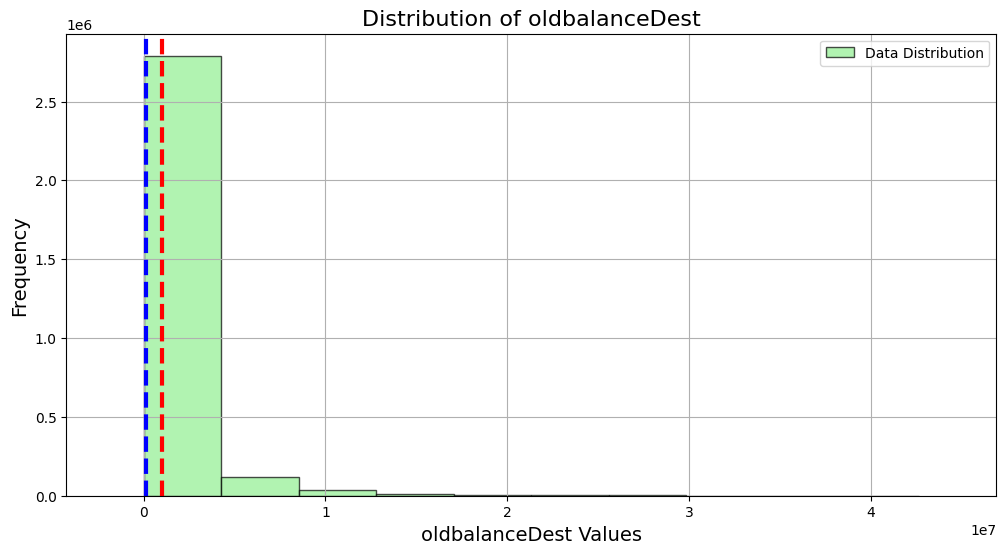

In [39]:
showPlot('oldbalanceDest', bins=10, color='lightgreen')

By analyzing the 'oldbalanceDest' feature, we can identify any significant differences in the balances of destination accounts prior to the transaction, which could be indicative of unusual patterns or suspicious behavior.

## **Visualizing the 'newbalanceDest' Feature**

The **'newbalanceDest'** feature represents the balance of the destination account after the transaction has been completed. This feature is significant because it shows how the balance of the recipient's account has changed following the transaction.

We use a histogram to visualize the distribution of **'newbalanceDest'** values. **This helps us observe how the destination account balances are distributed after receiving funds and can highlight any significant changes in the recipient's account.**


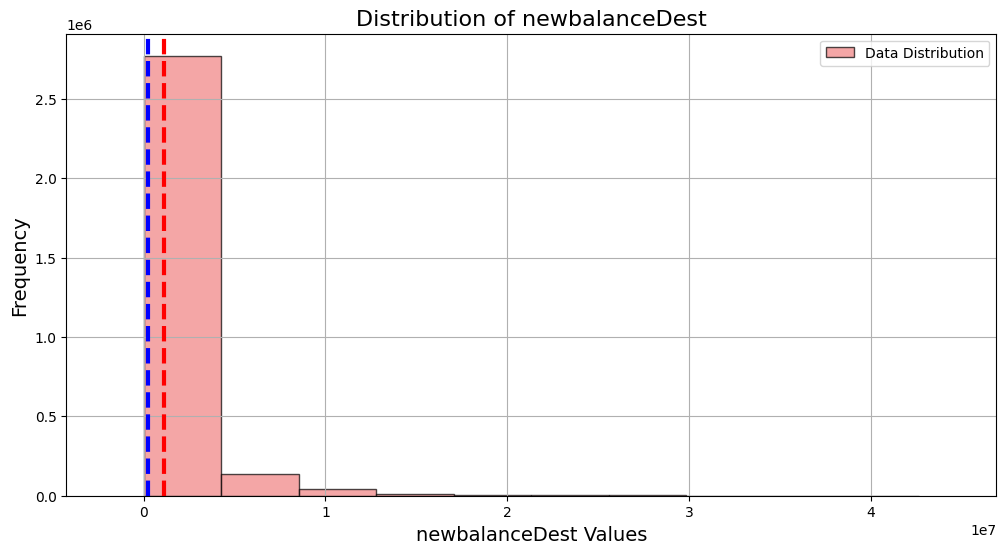

In [40]:
showPlot('newbalanceDest', bins=10, color='lightcoral')

By analyzing the 'newbalanceDest' feature, we can identify unusual patterns or discrepancies in the balance changes of destination accounts, which might indicate fraudulent activity or anomalies in the transaction process.